# Springboard 2019 - Project Capstone

## Data Storytelling

### Background
The following data exploration steps were conducted to explore my final data steps of online professional profiles (OPP) information on recent graduates in Canada and the U.S. to uncover patterns and trends as part of my capstone project for the Sprinboard Intermediate Python for Data Science course. The data was pulled from a private data vendor and includes data on employers, career paths, start dates, education (majors, degrees, etc.) and skills of youth / recent graduates. The final project will investigate skill cluster themes in relation to students' education and career paths. 

The following data exploration steps are motivated a simple question: What pathway traits are associated with certain skills attained by youth, how do they compare between the U.S. and Canada, and what can we learn about how prepared youth are for the changing nature of work? 

To break this down, I consider the following questions for investigation: 
* Do students enter into the field they train for? How does this differ between countries and discipline? 
* How many credentials do youth have? What kinds?
* What are the most common forms of entry-level work experience for recent graduates? Does this different by field of study or country? 
* What is the average retention between occupations? Does this share any relationship with the discipline of study? 
* What are the top skills by degree program? 
* Can we see which degree programs are associated with faster entry and/or progression in/through the labour market? 
* What mix of skills are showing up? By degree program? Level of credential? 

### Code

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

#read in data file
df = pd.read_csv('SB19-Can-US-Main.csv')
df.head()

,Unnamed: 0,id,country,job_1,job_2,job_3,job_4,job_5,job_6,employer_1,...,degree_2_type,degree_3_type,degree_4_type,job_count,degree_count,time_job_2,time_job_3,time_job_4,time_job_1_4,skill_list
0,0,UvVMY-N9uT9i6wdg8nX-sQ_0000,US,adjunct faculty,chemist,NaN,NaN,NaN,NaN,dixie state university,...,NaN,NaN,NaN,2,1,1.0,NaN,NaN,NaN,"microsoft office,microsoft word,powerpoint,res..."
1,1,1fFD-E25MpwW8uvA0gwOWw_0000,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ot,NaN,NaN,0,2,NaN,NaN,NaN,NaN,"household,writing,reflection,transferring,admi..."
2,2,wRdXL4mwhnUGdwg7eVAFYQ_0000,US,marketing associate,product manager,NaN,NaN,NaN,NaN,new york life insurance company,...,NaN,NaN,NaN,2,1,5.0,NaN,NaN,NaN,"facebook,management,powerpoint,social media,ma..."
3,3,gMzn1TIgTl-etAKXbJipZQ_0000,US,summer intern,internship,software engineer,NaN,NaN,NaN,itri,...,ma,NaN,NaN,3,2,2.0,2.0,NaN,NaN,"matlab,python,objective c,r,machine learning,n..."
4,4,IrpjwrXdzNecrwwzdTH1-w_0000,US,maintance,mechanic,mechanic,maintenance worker,NaN,NaN,toyotaid,...,se,Ot,NaN,4,3,1.0,4.0,1.0,6.0,hoists


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753315 entries, 0 to 753314
Data columns (total 54 columns):
Unnamed: 0          753315 non-null int64
id                  753315 non-null object
country             753315 non-null object
job_1               600101 non-null object
job_2               513927 non-null object
job_3               430154 non-null object
job_4               338815 non-null object
job_5               250366 non-null object
job_6               174365 non-null object
employer_1          599972 non-null object
employer_2          517602 non-null object
employer_3          436531 non-null object
employer_4          349101 non-null object
employer_5          263586 non-null object
employer_6          188717 non-null object
job_start_year_1    602643 non-null float64
job_start_year_2    515466 non-null float64
job_start_year_3    431095 non-null float64
job_start_year_4    339270 non-null float64
job_start_year_5    250514 non-null float64
job_start_year_6    17424

In [35]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
#look at number of jobs youth have
df.job_count.value_counts(ascending=True)

5     76164
2     84335
1     85330
4     88638
3     91685
0    152434
6    174729
Name: job_count, dtype: int64

In [7]:
#look at number of degrees / credentials youth have 
df.degree_count.value_counts(ascending=True)

4     47842
3    101138
2    270521
1    333814
Name: degree_count, dtype: int64

                 id                     
degree_count      1      2      3      4
job_count                               
0             99803  41061   9022   2548
1             48356  27904   6729   2341
2             41215  30999   8876   3245
3             38797  35835  12072   4981
4             33198  35193  13891   6356
5             25802  30529  13348   6485
6             46643  69000  37200  21886


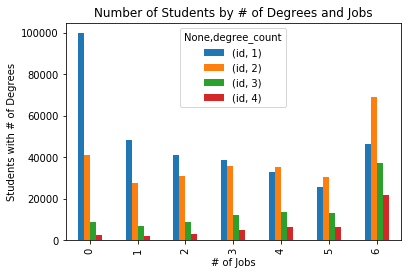

In [39]:
# matrix of job #s and degree #s
df_pv1 = pd.pivot_table(df, index=['job_count'], columns=['degree_count'], values=['id'], aggfunc='count')
print(df_pv1)
df_pv1.plot.bar()

plt.ylabel('Students with # of Degrees')
plt.xlabel('# of Jobs')
plt.title('Number of Students by # of Degrees and Jobs')

plt.show()

### Observation: 
On average, we can see that as youth / recent graduates progress through their career, by job 4 they start to increase the number of credentials they hold. By job 6, a much higher number hold at least 2 degrees. 

In [89]:
# number of jobs by grad year
df_pv2 = pd.pivot_table(df, index=['job_count'], columns=['grad_1'], values=['id'], aggfunc='count')
print(df_pv2)

                id                                                        \
grad_1        2008     2009     2010     2011     2012     2013     2014   
job_count                                                                  
0           6254.0   7655.0  10762.0  11835.0  20842.0  21467.0  23300.0   
1           2604.0   2896.0   4783.0   5118.0  12794.0  12613.0  13315.0   
2           3092.0   3572.0   5525.0   5803.0  13361.0  13123.0  12674.0   
3           3761.0   4633.0   6591.0   6925.0  15038.0  14229.0  13540.0   
4           3976.0   4832.0   6766.0   6994.0  15032.0  13721.0  12664.0   
5           3729.0   4446.0   6285.0   6278.0  12817.0  12043.0  10838.0   
6          10570.0  12598.0  16590.0  16405.0  30405.0  27207.0  22633.0   

                                                                          \
grad_1        2015     2016    2017    2018    2019    2020   2021  2022   
job_count                                                                  
0          

In [9]:
# look at industries
df.industry_list_1.value_counts()

hospital & health care                  49069
marketing and advertising               29175
financial services                      26522
accounting                              25980
computer software                       24283
information technology and services     22180
higher education                        21035
retail                                  18663
mechanical or industrial engineering    13757
research                                13682
human resources                         11467
education management                    10311
public relations and communications      9679
food production                          8888
banking                                  8639
design                                   8503
hospitality                              8487
oil & energy                             8343
medical practice                         8280
construction                             7896
civil engineering                        7613
environmental services            

In [10]:
# to explore differences between countries
df_usa = df[df.country == 'US']
df_can = df[df.country == 'CAN']

In [11]:
# look at differences in industry composition
## USA
ind_usa = df_usa.industry_list_1.value_counts()[:20]
print(ind_usa)

hospital & health care                  35039
marketing and advertising               17945
financial services                      15864
information technology and services     14754
computer software                       13788
higher education                        13655
accounting                              13028
retail                                  12841
mechanical or industrial engineering     7474
research                                 7255
education management                     7236
medical practice                         6635
public relations and communications      6375
food production                          5967
human resources                          5907
hospitality                              5512
design                                   5188
military                                 4949
entertainment                            4814
construction                             4782
Name: industry_list_1, dtype: int64


In [33]:
## CANADA
ind_can = df_can.industry_list_1.value_counts()[:20]
print(ind_can)

hospital & health care                  14030
accounting                              12952
marketing and advertising               11230
financial services                      10658
computer software                       10495
information technology and services      7426
higher education                         7380
research                                 6427
mechanical or industrial engineering     6283
retail                                   5822
human resources                          5560
banking                                  4825
oil & energy                             4816
civil engineering                        4384
environmental services                   3835
design                                   3315
public relations and communications      3304
government administration                3181
construction                             3114
education management                     3075
Name: industry_list_1, dtype: int64


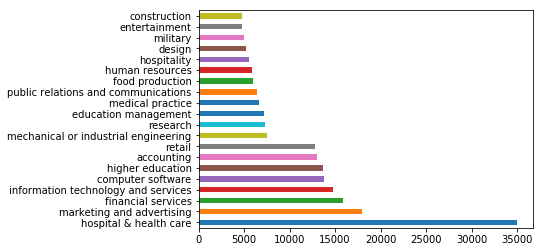

In [34]:
# USA
ind_usa.plot(kind='barh')

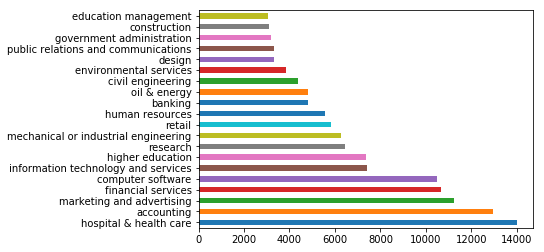

In [35]:
# CANADA
ind_can.plot(kind='barh')

In [69]:
# hospital & health is at the top of the list - what are the most common jobs here? 

df_health = df[df.industry_list_1 == 'hospital & health care']
df_health.job_1.value_counts()

registered nurse                                                             1322
sales associate                                                               922
cashier                                                                       693
intern                                                                        520
research assistant                                                            486
administrative assistant                                                      456
rn                                                                            431
server                                                                        421
customer service representative                                               330
certified nursing assistant                                                   325
lifeguard                                                                     300
volunteer                                                                     274
receptionist    

Other                               256755
Business and Comms                  125800
Science, Math, Eng, and Arch         96199
Social Science                       66971
Culture, Language, and Fine Arts     41708
Health and Education                 27544
Computer and IT                      18306
Law and Government                   10104
Tourism and Hospitality               4072
Construction and Trades               1551
Name: major_1_type, dtype: int64


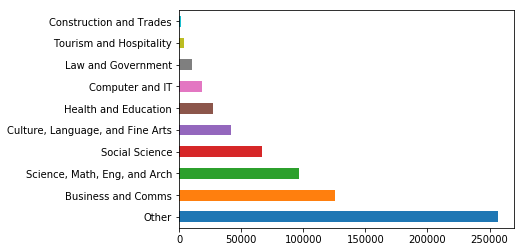

In [70]:
## Note: observable differences between primary industry of employment, but health, finance, marketing, IT and computer make top 10 in each

# now look at general trends between discipline of study and industry of employment
print(df.major_1_type.value_counts())
df.major_1_type.value_counts().plot(kind='barh')

In [38]:
# look into the 'other category'
df_other = df[df.major_1_type == 'Other']
df_other.major_1.value_counts()

Other         256252
aviation         451
voice             44
sommelier          4
conducting         4
Name: major_1, dtype: int64

In [12]:
# we want to see how broadly if students go into the industry they study for
## create different data frames for fields of study for the first degree 

df_CLFA = df[df.major_1_type == 'Culture, Language, and Fine Arts']
df_SMEA = df[df.major_1_type == 'Science, Math, Eng, and Arch']
df_SS = df[df.major_1_type == 'Social Science']
df_HE = df[df.major_1_type == 'Health and Education']
df_BC = df[df.major_1_type  == 'Business and Comms']
df_CIT = df[df.major_1_type  == 'Computer and IT']
df_Other = df[df.major_1_type == 'Other']

Top industries of employment by graduates in Culture, Language and Fine Arts:
design                                 0.072424
graphic design                         0.051709
marketing and advertising              0.049442
writing and editing                    0.048231
music                                  0.040347
entertainment                          0.034190
retail                                 0.034138
higher education                       0.034061
fine art                               0.031948
public relations and communications    0.030583
hospital & health care                 0.027465
apparel & fashion                      0.026074
education management                   0.024605
media production                       0.022647
photography                            0.021797
performing arts                        0.018808
motion pictures and film               0.018525
information technology and services    0.015124
primary/secondary education            0.014840
financial 

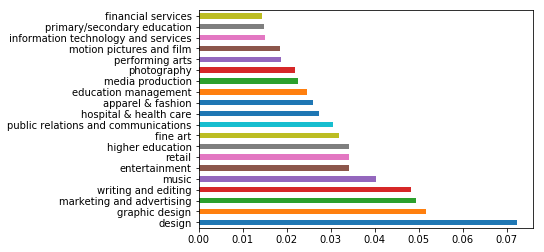

In [61]:
#df_CLFA
df_CFLA_ind = df_CLFA.industry_list_1.value_counts(normalize=True)[:20]
print("Top industries of employment by graduates in Culture, Language and Fine Arts:")
print(df_CFLA_ind)
df_CFLA_ind.plot(kind='barh')

Top industries of employment by graduates in Science, Math, and Engineering:
mechanical or industrial engineering    0.093640
hospital & health care                  0.091841
computer software                       0.058635
research                                0.056474
civil engineering                       0.055025
oil & energy                            0.039397
higher education                        0.039222
environmental services                  0.035648
electrical/electronic manufacturing     0.032074
biotechnology                           0.029890
information technology and services     0.029890
chemicals                               0.023863
architecture & planning                 0.019074
medical practice                        0.018023
financial services                      0.017030
construction                            0.016271
aviation & aerospace                    0.015079
pharmaceuticals                         0.014425
food production                         0

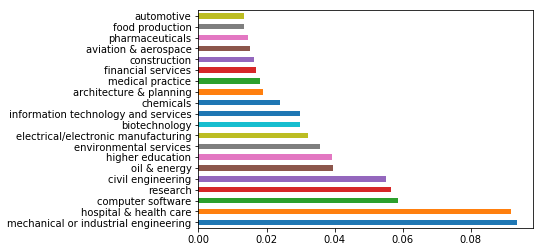

In [60]:
#df_SMEA
df_SMEA_ind = df_SMEA.industry_list_1.value_counts(normalize=True)[:20]
print("Top industries of employment by graduates in Science, Math, and Engineering:")
print(df_SMEA_ind)
df_SMEA_ind.plot(kind='barh')

Top industries of employment by graduates in Social Science:
hospital & health care                 0.062415
financial services                     0.055296
higher education                       0.052833
mental health care                     0.050337
research                               0.034396
retail                                 0.032860
human resources                        0.032186
individual & family services           0.030667
marketing and advertising              0.030313
non-profit organization management     0.026939
education management                   0.025759
law practice                           0.024240
information technology and services    0.022216
government administration              0.020209
banking                                0.019264
accounting                             0.017729
international affairs                  0.016245
primary/secondary education            0.015182
legal services                         0.014069
consumer services          

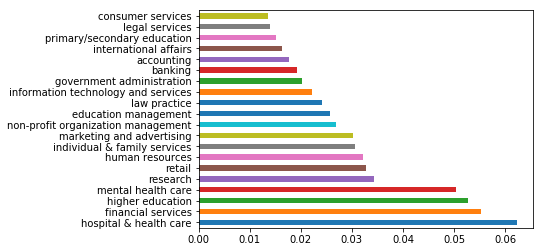

In [62]:
#df_SS
df_SS_ind = df_SS.industry_list_1.value_counts(normalize=True)[:20]
print("Top industries of employment by graduates in Social Science:")
print(df_SS_ind)
df_SS_ind.plot(kind="barh")

Top industries of employment by graduates in Health and Education:
hospital & health care                 0.424291
education management                   0.085875
medical practice                       0.058903
primary/secondary education            0.052878
higher education                       0.040826
pharmaceuticals                        0.028980
retail                                 0.020085
mental health care                     0.018364
individual & family services           0.012625
research                               0.012256
non-profit organization management     0.010657
music                                  0.008854
sports                                 0.007788
human resources                        0.007665
food production                        0.007460
information technology and services    0.007378
financial services                     0.007378
marketing and advertising              0.006927
government administration              0.006640
consumer services    

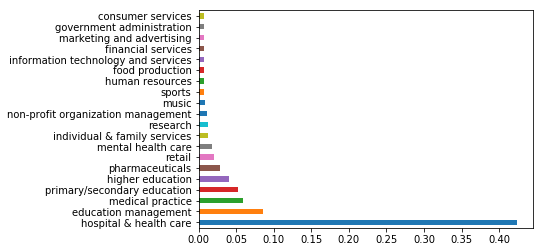

In [65]:
#df_HE
df_HE_ind = df_HE.industry_list_1.value_counts(normalize=True)[:20]
print("Top industries of employment by graduates in Health and Education:")
print(df_HE_ind)
df_HE_ind.plot(kind="barh")

Top industries of employment by graduates in Business and Communicaations:
accounting                             0.125908
marketing and advertising              0.095052
financial services                     0.084091
hospital & health care                 0.036461
human resources                        0.036040
information technology and services    0.034862
retail                                 0.033770
banking                                0.028113
public relations and communications    0.025775
higher education                       0.022216
hospitality                            0.019017
real estate                            0.018106
logistics and supply chain             0.017135
management consulting                  0.015982
insurance                              0.015561
sports                                 0.015131
food production                        0.014487
construction                           0.012526
consumer services                      0.012200
automotive   

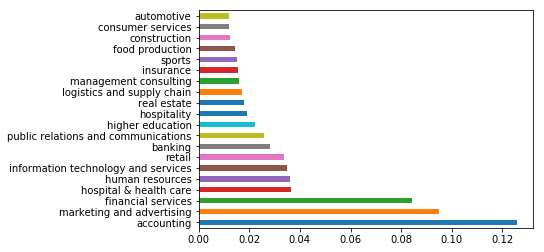

In [66]:
#df_BC
df_BC_ind = df_BC.industry_list_1.value_counts(normalize=True)[:20]
print("Top industries of employment by graduates in Business and Communicaations:")
print(df_BC_ind)
df_BC_ind.plot(kind="barh")

Top industries of employment by graduates in Computer and IT:
computer software                      0.409030
information technology and services    0.176892
animation                              0.030705
computer & network security            0.029648
computer networking                    0.026184
design                                 0.025010
computer games                         0.022838
higher education                       0.016615
internet                               0.016145
telecommunications                     0.013679
financial services                     0.013092
retail                                 0.012446
hospital & health care                 0.011624
marketing and advertising              0.008395
entertainment                          0.008337
graphic design                         0.007397
research                               0.007163
computer hardware                      0.006341
accounting                             0.006047
military                  

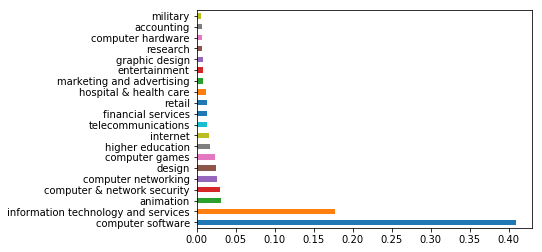

In [67]:
#df_CIT
df_CIT_ind = df_CIT.industry_list_1.value_counts(normalize=True)[:20]
print("Top industries of employment by graduates in Computer and IT:")
print(df_CIT_ind)
df_CIT_ind.plot(kind="barh")

Top industries of employment by graduates in Other:
hospital & health care                  0.077262
marketing and advertising               0.057120
financial services                      0.044973
computer software                       0.039237
accounting                              0.038131
higher education                        0.037506
information technology and services     0.035710
retail                                  0.029970
research                                0.023396
mechanical or industrial engineering    0.020818
public relations and communications     0.019628
human resources                         0.016767
medical practice                        0.014999
education management                    0.014295
hospitality                             0.014267
design                                  0.013513
sports                                  0.013508
food production                         0.013490
banking                                 0.011814
entertainment    

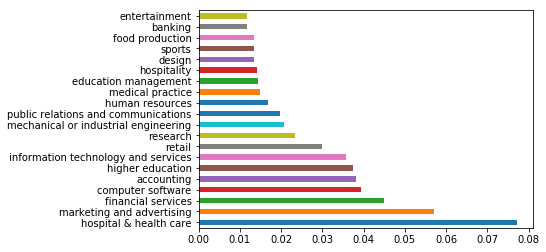

In [68]:
#df_Other
df_Other_ind = df_Other.industry_list_1.value_counts(normalize=True)[:20]
print("Top industries of employment by graduates in Other:")
print(df_Other_ind)
df_Other_ind.plot(kind="barh")

### Observations: Do students enter into the field they train for? How does this differ between countries and discipline?
* We've observed slight differences in industry compositions of youth employment between Canada and the USA, but the top 10 industries for youth early employment is comparably similar. Hospital and health take the top spot for most common industry for youth employment, employing mostly nurses, interns, sales associates, research assistants, and admin asisstants.
* Between our six primary disciplines of study, students that study for their first degree in Health and Education or Computer & IT, are most centralized in one industry (up to 40%).
* The other four disciplines results in broader career outcomes. 

Top entry-level jobs for all graduates:
sales associate                    0.025682
intern                             0.022386
cashier                            0.015949
research assistant                 0.010163
customer service representative    0.009390
administrative assistant           0.009382
server                             0.007947
assistant manager                  0.006824
manager                            0.005616
office assistant                   0.004669
lifeguard                          0.004491
sales representative               0.004439
summer intern                      0.004383
receptionist                       0.004141
barista                            0.003716
supervisor                         0.003506
customer service                   0.003356
teaching assistant                 0.003354
internship                         0.003284
crew member                        0.003274
Name: job_1, dtype: float64


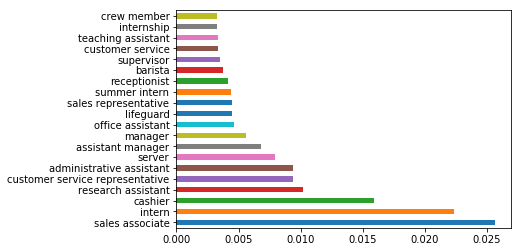

In [74]:
# Now explore entry level job themes by discpline of study - where do graduates get their first work experience?

#df_CLFA = df[df.major_1_type == 'Culture, Language, and Fine Arts']
#df_SMEA = df[df.major_1_type == 'Science, Math, Eng, and Arch']
#df_SS = df[df.major_1_type == 'Social Science']
#df_HE = df[df.major_1_type == 'Health and Education']
#df_BC = df[df.major_1_type  == 'Business and Comms']
#df_CIT = df[df.major_1_type  == 'Computer and IT']
#df_Other = df[df.major_1_type == 'Other']

#df_ALL --> look at top entry level jobs for baseline comparison
df_ALL_job1 = df.job_1.value_counts(normalize=True)[:20]
print("Top entry-level jobs for all graduates:")
print(df_ALL_job1)
df_ALL_job1.plot(kind='barh')

Top entry-level jobs by graduates in the USA:
intern                             0.029151
sales associate                    0.025801
cashier                            0.016663
administrative assistant           0.008737
server                             0.008623
research assistant                 0.008269
assistant manager                  0.007758
manager                            0.006389
customer service representative    0.005799
office assistant                   0.005775
lifeguard                          0.005323
summer intern                      0.004680
receptionist                       0.004009
crew member                        0.003826
barista                            0.003494
volunteer                          0.003433
owner                              0.003395
camp counselor                     0.003393
marketing intern                   0.003374
hostess                            0.003334
Name: job_1, dtype: float64


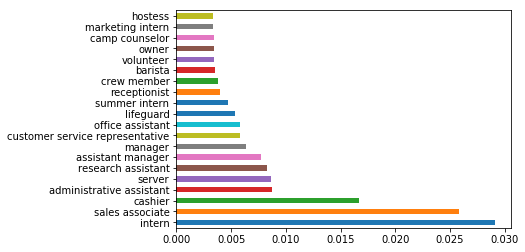

In [77]:
## Does this differ between CAN and USA? 

#df_USA
df_usa_job1 = df_usa.job_1.value_counts(normalize=True)[:20]
print("Top entry-level jobs by graduates in the USA:")
print(df_usa_job1)
df_usa_job1.plot(kind='barh')

Top entry-level jobs by graduates in Canada:
sales associate                    0.025483
customer service representative    0.015420
cashier                            0.014750
research assistant                 0.013344
intern                             0.011027
administrative assistant           0.010465
server                             0.006813
sales representative               0.006406
assistant manager                  0.005255
teaching assistant                 0.004996
supervisor                         0.004759
receptionist                       0.004362
manager                            0.004317
barista                            0.004089
customer service                   0.003888
summer intern                      0.003884
summer student                     0.003701
internship                         0.003219
software developer                 0.003103
lifeguard                          0.003094
Name: job_1, dtype: float64


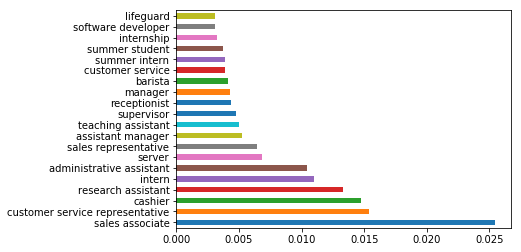

In [78]:
#df_can
df_can_job1 = df_can.job_1.value_counts(normalize=True)[:20]
print("Top entry-level jobs by graduates in Canada:")
print(df_can_job1)
df_can_job1.plot(kind='barh')

Top entry-level jobs by graduates in Culture, Language and Fine Arts:
sales associate                    0.032791
intern                             0.022927
cashier                            0.012927
administrative assistant           0.010894
graphic designer                   0.010298
customer service representative    0.009241
server                             0.009079
assistant manager                  0.007940
barista                            0.005935
manager                            0.005610
photographer                       0.004932
receptionist                       0.004743
graphic design intern              0.004661
office assistant                   0.004390
owner                              0.004363
customer service                   0.004228
sales representative               0.003984
design intern                      0.003740
supervisor                         0.003686
research assistant                 0.003659
Name: job_1, dtype: float64


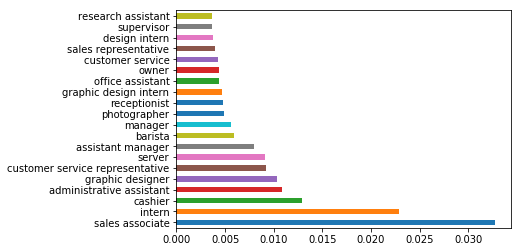

In [76]:
#df_CLFA
df_CFLA_job1 = df_CLFA.job_1.value_counts(normalize=True)[:20]
print("Top entry-level jobs by graduates in Culture, Language and Fine Arts:")
print(df_CFLA_job1)
df_CFLA_job1.plot(kind='barh')

Top entry-level jobs by graduates in Science, Math, Eng, and Arch:
research assistant                  0.028193
intern                              0.024060
sales associate                     0.014583
cashier                             0.009610
engineering intern                  0.008829
teaching assistant                  0.006655
undergraduate research assistant    0.006499
summer intern                       0.005934
customer service representative     0.005574
administrative assistant            0.005105
internship                          0.004841
server                              0.004841
lifeguard                           0.004817
assistant manager                   0.004204
software developer                  0.003628
manager                             0.003472
undergraduate researcher            0.003399
research intern                     0.003351
tutor                               0.003339
software engineer                   0.003279
Name: job_1, dtype: float64


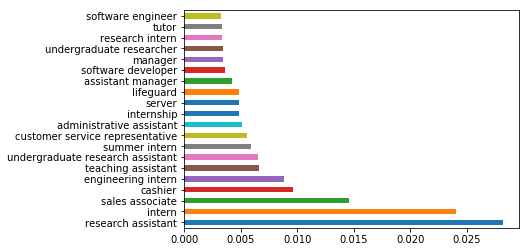

In [68]:
#df_SMEA
df_SMEA_job1 = df_SMEA.job_1.value_counts(normalize=True)[:20]
print("Top entry-level jobs by graduates in Science, Math, Eng, and Arch:")
print(df_SMEA_job1)
df_SMEA_job1.plot(kind='barh')

Top entry-level jobs by graduates in Social Science:
sales associate                    0.027102
intern                             0.023334
research assistant                 0.015952
administrative assistant           0.014544
cashier                            0.013220
customer service representative    0.011981
server                             0.008808
assistant manager                  0.007365
manager                            0.006058
office assistant                   0.005889
receptionist                       0.005210
summer intern                      0.004616
sales representative               0.004548
barista                            0.004463
teaching assistant                 0.004446
supervisor                         0.004107
lifeguard                          0.003581
customer service                   0.003581
volunteer                          0.003530
associate                          0.002953
Name: job_1, dtype: float64


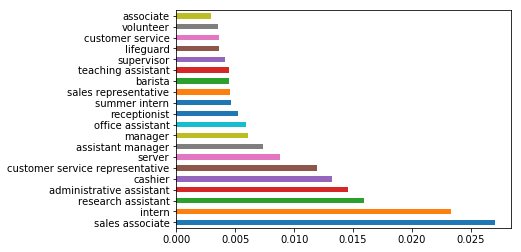

In [69]:
##df_SS
df_SS_job1 = df_SS.job_1.value_counts(normalize=True)[:20]
print("Top entry-level jobs by graduates in Social Science:")
print(df_SS_job1)
df_SS_job1.plot(kind='barh')

Top entry-level jobs by graduates in Health and Education:
registered nurse                   0.053498
rn                                 0.017078
sales associate                    0.015727
teacher                            0.014377
cashier                            0.011153
server                             0.008582
intern                             0.008539
certified nursing assistant        0.007058
administrative assistant           0.006970
customer service representative    0.006840
pharmacy technician                0.006709
research assistant                 0.005664
assistant manager                  0.005184
pharmacy intern                    0.004618
manager                            0.004574
substitute teacher                 0.004226
nursing student                    0.004008
medical assistant                  0.003964
receptionist                       0.003877
lifeguard                          0.003790
Name: job_1, dtype: float64


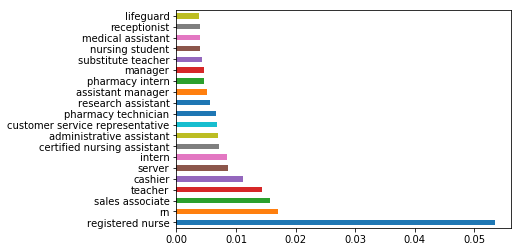

In [70]:
#df_HE
df_HE_job1 = df_HE.job_1.value_counts(normalize=True)[:20]
print("Top entry-level jobs by graduates in Health and Education:")
print(df_HE_job1)
df_HE_job1.plot(kind='barh')

Top entry-level jobs by graduates in Business and Communications:
sales associate                    0.027069
intern                             0.017835
customer service representative    0.014673
administrative assistant           0.012414
cashier                            0.012289
assistant manager                  0.009734
manager                            0.008529
server                             0.008038
sales representative               0.007055
office assistant                   0.004537
marketing intern                   0.004465
receptionist                       0.004349
supervisor                         0.004322
owner                              0.003938
staff accountant                   0.003840
accountant                         0.003706
summer intern                      0.003662
customer service                   0.003608
office manager                     0.003403
accounting intern                  0.003358
Name: job_1, dtype: float64


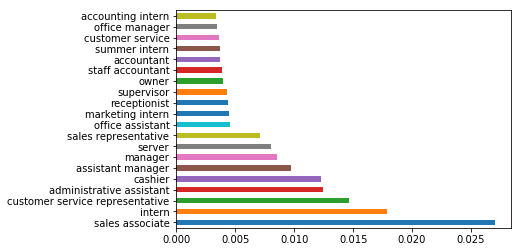

In [71]:
# BC
df_BC_job1 = df_BC.job_1.value_counts(normalize=True)[:20]
print("Top entry-level jobs by graduates in Business and Communications:")
print(df_BC_job1)
df_BC_job1.plot(kind='barh')

Top entry-level jobs by graduates in Computer & IT:
intern                             0.025034
software developer                 0.023878
software engineer                  0.022402
research assistant                 0.012196
web developer                      0.012132
sales associate                    0.010655
cashier                            0.009307
teaching assistant                 0.007446
software engineering intern        0.005713
customer service representative    0.005649
programmer                         0.005263
internship                         0.005263
computer technician                0.004429
assistant manager                  0.004365
summer intern                      0.004236
it intern                          0.004172
software engineer intern           0.003787
developer                          0.003530
manager                            0.003530
administrative assistant           0.003466
Name: job_1, dtype: float64


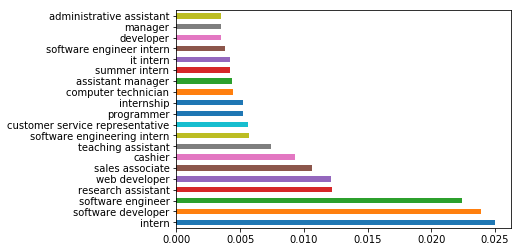

In [79]:
# CIT
df_CIT_job1 = df_CIT.job_1.value_counts(normalize=True)[:20]
print("Top entry-level jobs by graduates in Computer & IT:")
print(df_CIT_job1)
df_CIT_job1.plot(kind='barh')

Top entry-level jobs by graduates in Other:
sales associate                    0.030483
intern                             0.027492
cashier                            0.020872
server                             0.009130
research assistant                 0.008867
administrative assistant           0.008460
customer service representative    0.007827
lifeguard                          0.006592
assistant manager                  0.005890
office assistant                   0.005515
summer intern                      0.005506
crew member                        0.004655
manager                            0.004632
camp counselor                     0.004517
barista                            0.004493
receptionist                       0.004470
hostess                            0.004225
sales representative               0.004105
volunteer                          0.004096
waitress                           0.003666
Name: job_1, dtype: float64


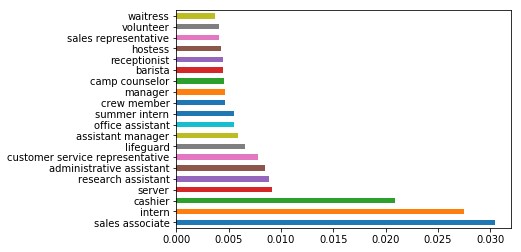

In [80]:
# Other
df_Other_job1 = df_Other.job_1.value_counts(normalize=True)[:20]
print("Top entry-level jobs by graduates in Other:")
print(df_Other_job1)
df_Other_job1.plot(kind='barh')

### Observations: What are the most common forms of entry-level work experience for recent graduates? Does this different by field of study or country? 
* We've taken a first look at the top 20 jobs for job 1 and inferred this to be "entry-level work experience" or graduates' first real step in attaining work experience / entering into the labour market. 
* We've taken a look at how this differs betwee countries: in both countries low-skill entry level jobs like intern, sales associate, cashier, admin assistant, and servers / hostesses are common. The first higher skilled positions to show up are "owner" in the USA and "software developer" in Canada. The results however from the top 20 are highly dispersed, limiting the amount of insight we can infer.
* We've also looked at how this differs between discplines of study: "intern" and "sales associate" are the most common shared entry-level work experiences across disciplines. Similar to some of the findings below, we see more specialized jobs appear in both Health and Education and Computer & IT, maybe indicating more direct/early entry into the field of study than other disciplines.


In [71]:
df.degree_1_type.value_counts()

ba    320322
se    187890
Ot    153314
as     73331
ma     16523
do      1935
Name: degree_1_type, dtype: int64

In [72]:
## Note: the most popular degree type is "BA", followed by "Secondary Education", "Other", "Associate", "Masters", and "Doctorate"

In [77]:
df.degree_2_type.value_counts(normalize=True)

ba    0.449587
Ot    0.331525
ma    0.107018
as    0.051356
se    0.045180
do    0.015335
Name: degree_2_type, dtype: float64

In [79]:
df.degree_3_type.value_counts(normalize=True)

Ot    0.432615
ba    0.339374
ma    0.147094
as    0.031944
do    0.030534
se    0.018439
Name: degree_3_type, dtype: float64

In [81]:
df.degree_4_type.value_counts(normalize=True)

Ot    0.508904
ba    0.271561
ma    0.148844
do    0.033025
as    0.025919
se    0.011747
Name: degree_4_type, dtype: float64

In [27]:
df_grad1 = df.grad_1.value_counts()
df_grad2 = df.grad_2.value_counts()
df_grad3 = df.grad_3.value_counts()
df_grad4 = df.grad_4.value_counts()

Graduates by year for first degree:
2012    120289
2013    114403
2014    108964
2015     87285
2016     64044
2011     59358
2010     57302
2009     40632
2008     33986
2017     33902
2018     19420
2019      9639
2020      3413
2021       416
2022       198
2023        61
2024         3
Name: grad_1, dtype: int64


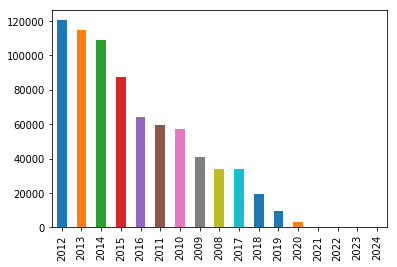

In [28]:
print("Graduates by year for first degree:")
print(df_grad1)
df_grad1.plot.bar()

Graduates by year for second degree:
2015.0    65377
2016.0    64830
2014.0    63856
2017.0    50477
2013.0    47966
2012.0    37262
2018.0    33893
2019.0    17758
2011.0    13383
2010.0     9192
2020.0     7721
2009.0     4110
2008.0     1613
2021.0     1554
2022.0      398
2023.0       89
2024.0       17
2025.0        5
Name: grad_2, dtype: int64


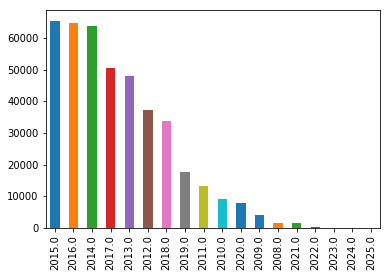

In [29]:
print("Graduates by year for second degree:")
print(df_grad2)
df_grad2.plot.bar()

Graduates by year for third degree:
2017.0    25439
2016.0    25163
2015.0    20529
2018.0    20387
2014.0    16863
2019.0    11307
2013.0    10693
2012.0     6967
2020.0     5321
2011.0     2359
2021.0     1567
2010.0     1200
2022.0      556
2009.0      367
2023.0      129
2008.0       99
2024.0       25
2025.0        8
2028.0        1
Name: grad_3, dtype: int64


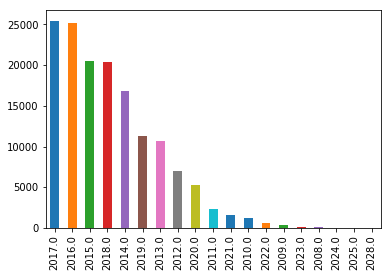

In [30]:
print("Graduates by year for third degree:")
print(df_grad3)
df_grad3.plot.bar()

Graduates by year for fourth degree:
2017.0    8840
2018.0    8539
2016.0    7395
2015.0    5347
2019.0    5085
2014.0    4282
2020.0    2558
2013.0    2402
2012.0    1447
2021.0     885
2011.0     447
2022.0     305
2010.0     153
2023.0      81
2009.0      45
2024.0      21
2008.0       6
2025.0       4
Name: grad_4, dtype: int64


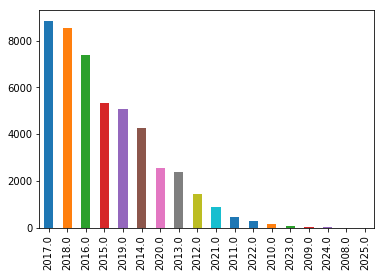

In [31]:
print("Graduates by year for fourth degree:")
print(df_grad4)
df_grad4.plot.bar()

In [40]:
## Data Note: Some students have listed an "expected" graduation date in the future. 

In [41]:
# Create columns for time between credentials. 

df['time_grad2'] = df['grad_2'] - df['grad_1'] 
df['time_grad3'] = df['grad_3'] - df['grad_2'] 
df['time_grad4'] = df['grad_4'] - df['grad_3'] 
df['time_grad5'] = df['grad_5'] - df['grad_4'] 
df['time_grad6'] = df['grad_6'] - df['grad_5'] 

In [42]:
df.head()

,id,country,job_1,job_2,job_3,job_4,job_5,job_6,employer_1,employer_2,...,skill_list,time_grad1_job1,time_grad1_job2,time_grad1_job3,time_grad1_job4,time_grad2,time_grad3,time_grad4,time_grad5,time_grad6
0,UvVMY-N9uT9i6wdg8nX-sQ_0000,US,adjunct faculty,chemist,NaN,NaN,NaN,NaN,dixie state university,washington county water conservancy district,...,"microsoft office,microsoft word,powerpoint,res...",0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1fFD-E25MpwW8uvA0gwOWw_0000,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"household,writing,reflection,transferring,admi...",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,wRdXL4mwhnUGdwg7eVAFYQ_0000,US,marketing associate,product manager,NaN,NaN,NaN,NaN,new york life insurance company,american express,...,"facebook,management,powerpoint,social media,ma...",0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,gMzn1TIgTl-etAKXbJipZQ_0000,US,summer intern,internship,software engineer,NaN,NaN,NaN,itri,itri,...,"matlab,python,objective c,r,machine learning,n...",-1.0,1.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN
4,IrpjwrXdzNecrwwzdTH1-w_0000,US,maintance,mechanic,mechanic,maintenance worker,NaN,NaN,toyotaid,rosnett trucking,...,hoists,4.0,5.0,9.0,10.0,0.0,2.0,NaN,NaN,NaN


In [45]:
df.time_grad2.value_counts(normalize=True)

4.0     0.272486
2.0     0.204510
3.0     0.158734
1.0     0.150631
0.0     0.086016
5.0     0.080295
6.0     0.027754
7.0     0.011268
8.0     0.004903
9.0     0.002045
10.0    0.000880
11.0    0.000305
12.0    0.000143
13.0    0.000021
14.0    0.000005
15.0    0.000002
Name: time_grad2, dtype: float64

In [46]:
df.time_grad3.value_counts(normalize=True)

1.0     0.277614
2.0     0.229944
3.0     0.156001
0.0     0.131172
4.0     0.128662
5.0     0.047510
6.0     0.017841
7.0     0.007135
8.0     0.002806
9.0     0.000819
10.0    0.000376
11.0    0.000101
12.0    0.000013
13.0    0.000007
Name: time_grad3, dtype: float64

In [47]:
df.time_grad4.value_counts(normalize=True)

1.0     0.337528
2.0     0.205363
0.0     0.198508
3.0     0.123553
4.0     0.080829
5.0     0.032691
6.0     0.013858
7.0     0.004933
8.0     0.001818
9.0     0.000648
10.0    0.000188
11.0    0.000063
12.0    0.000021
Name: time_grad4, dtype: float64

In [49]:
df.time_grad5.value_counts(normalize=True)

1.0     0.369533
0.0     0.248457
2.0     0.180910
3.0     0.097330
4.0     0.062114
5.0     0.027032
6.0     0.009860
7.0     0.003287
8.0     0.001274
9.0     0.000134
10.0    0.000067
Name: time_grad5, dtype: float64

In [50]:
## Note: It looks like as degrees / credentials increase in number, they take less time, indicating they may be more industry specific / forms up upskilling.

In [51]:
## Discipline specific dataframes: 
#df_CLFA = df[df.major_1_type == 'Culture, Language, and Fine Arts']
#df_SMEA = df[df.major_1_type == 'Science, Math, Eng, and Arch']
#df_SS = df[df.major_1_type == 'Social Science']
#df_HE = df[df.major_1_type == 'Health and Education']
#df_BC = df[df.major_1_type  == 'Business and Comms']
#df_CIT = df[df.major_1_type  == 'Computer and IT']
#df_Other = df[df.major_1_type == 'Other']

In [55]:
# Skills
df.skill_list.str.split(',', expand=True).stack().value_counts(normalize=True)[:20]

microsoft office      0.024810
customer service      0.022014
microsoft excel       0.020662
microsoft word        0.019008
powerpoint            0.016653
leadership            0.015325
public speaking       0.014240
research              0.013204
social media          0.012370
teamwork              0.012351
time management       0.011327
management            0.011126
sales                 0.008977
event planning        0.008095
communication         0.006685
marketing             0.006174
project management    0.005414
team leadership       0.005347
social networking     0.004815
training              0.004678
dtype: float64

In [59]:
## CLFA -> Culture, Language, and Fine Arts
df_CLFA.skill_list.str.split(',', expand=True).stack().value_counts(normalize=True)[:20]

microsoft office        0.028012
customer service        0.024246
social media            0.021839
microsoft word          0.019555
microsoft excel         0.018502
public speaking         0.017300
powerpoint              0.016930
research                0.015253
leadership              0.014624
photoshop               0.014269
event planning          0.011903
teamwork                0.011438
time management         0.010893
editing                 0.010044
management              0.008841
sales                   0.008538
social networking       0.007964
adobe creative suite    0.007898
marketing               0.007729
illustrator             0.007551
dtype: float64

In [60]:
## SMEA -> Science, Math, Eng, and Arch
df_SMEA.skill_list.str.split(',', expand=True).stack().value_counts(normalize=True)[:20]

microsoft office      0.033438
microsoft excel       0.026040
microsoft word        0.022232
research              0.019667
customer service      0.019220
powerpoint            0.018992
leadership            0.016541
teamwork              0.015382
public speaking       0.015340
matlab                0.014205
autocad               0.010494
time management       0.010331
project management    0.009859
engineering           0.009308
data analysis         0.009055
management            0.009015
c++                   0.007727
social media          0.007715
solidworks            0.006389
c                     0.006261
dtype: float64

In [61]:
## SS -> Social Sciences
df_SS.skill_list.str.split(',', expand=True).stack().value_counts(normalize=True)[:20]

microsoft office      0.033665
customer service      0.029990
microsoft excel       0.026285
public speaking       0.024693
research              0.024620
microsoft word        0.024505
leadership            0.023412
powerpoint            0.022310
social media          0.018954
teamwork              0.017424
time management       0.016478
event planning        0.014446
management            0.012711
sales                 0.009979
community outreach    0.008110
team leadership       0.007687
teaching              0.007288
data analysis         0.007149
communication         0.007031
social networking     0.006893
dtype: float64

In [62]:
## HE -> Health and Education
df_HE.skill_list.str.split(',', expand=True).stack().value_counts(normalize=True)[:20]

customer service    0.027873
microsoft office    0.027347
microsoft word      0.022324
public speaking     0.021558
microsoft excel     0.020924
powerpoint          0.020193
leadership          0.019195
healthcare          0.017706
research            0.016665
teaching            0.013287
teamwork            0.013169
nursing             0.012729
time management     0.012718
social media        0.011078
hospitals           0.010867
cpr certified       0.010679
management          0.010156
patient safety      0.009838
event planning      0.009664
bls                 0.007978
dtype: float64

In [63]:
## BC -> Business and Communications
df_BC.skill_list.str.split(',', expand=True).stack().value_counts(normalize=True)[:20]

microsoft office      0.031415
customer service      0.029986
microsoft excel       0.027889
microsoft word        0.023222
leadership            0.022595
powerpoint            0.020846
teamwork              0.017520
time management       0.017072
public speaking       0.016817
management            0.016794
social media          0.016662
sales                 0.013547
research              0.012466
marketing             0.011903
event planning        0.011028
team leadership       0.009271
project management    0.007589
social networking     0.007447
strategic planning    0.007374
accounting            0.006881
dtype: float64

In [64]:
## CIT -> Computer and IT
df_CIT.skill_list.str.split(',', expand=True).stack().value_counts(normalize=True)[:20]

java                    0.023826
microsoft office        0.020954
javascript              0.017241
c++                     0.017230
html                    0.016851
sql                     0.014979
c                       0.013682
microsoft excel         0.013316
python                  0.013217
customer service        0.012351
microsoft word          0.011329
css                     0.011321
linux                   0.010386
c#                      0.009762
mysql                   0.009435
powerpoint              0.009378
leadership              0.009075
php                     0.008943
programming             0.008850
software development    0.008144
dtype: float64

In [66]:
## Other
df_Other.skill_list.str.split(',', expand=True).stack().value_counts(normalize=True)[:20]

microsoft office      0.024670
customer service      0.021341
microsoft excel       0.020852
microsoft word        0.019793
powerpoint            0.017432
leadership            0.015934
public speaking       0.015309
social media          0.014125
research              0.013502
teamwork              0.013393
time management       0.012086
management            0.010430
event planning        0.009108
sales                 0.008582
communication         0.007399
marketing             0.006478
social networking     0.005785
team leadership       0.005245
photoshop             0.004885
project management    0.004859
dtype: float64

### Observations: Identifying skill patterns by degree program: 
* Essential office skills like Microsoft office, excel, and Word show up in the top lists of every degree program. 
* The top 5-10 skills are most commonly associated with human relation skills in customer service, public speaking and leadership -- with the exception of technical disciplines in Computer and IT where technical / computer-related skills and languages compose the remaining top skills. 
* Digital skills are pervasive across even the most academic and broader discplines like Culture, Language and Fine Arts and Social Sciences, citing social media, design software, data analysis, and powerpoint. 

## Key Conclusions for Futher Analysis: 

### Our Guiding Questions: 
* Do students enter into the field they train for? How does this differ between countries and discipline?
* How many credentials do youth have? What kinds?
* What is the average retention between occupations? Does this share any relationship with the discipline of study?
* What are the top skills by degree program?
* Can we see which degree programs are associated with faster entry and/or progression in/through the labour market?
* What mix of skills are showing up? By degree program? Level of credential?


### Themes Explored: 

* Education Pathways: At a broad level, most students enter into industries related to their first degree of study, but this is most prominent for degree programs in Health and Education (42%) and Computer & IT (41%). Accounting is the most centralized industry for Business and Communications graduates at 12%, while graduates in broader disciplines have wider industry-employment outcomes across different sectors. Further analysis could investigate this further for quantification. 

* Career Pathways: Health and Hospitals is the largest employment industry of recent graduates in both Canada and the US, largely composed of nurses, interns, research associates, and admin assistants. Beyond the Health sector, we explored various job themes by discpline of study. We looked at the most commmon points for early work experience by inferring job patterns for job 1. These mostly included low-skill entry level positions like intern, sales associate, and servers / barristas / hostesses. These did not differ much by country. These did differ by discipline of study with Health and Education and Computer & IT showing most direct and early work experience in that field of study (nurse and software developer, respectively).  

* Skill Themes: We looked at the most common skills reported by recent graduates, noting that essential office / digital skills are common across discplines, even in the most broad or academic ones. These include Microsoft Office, Excel, and Word. The top 5-10 skills are most commonly associated with human relation skills in customer service, public speaking and leadership -- with the exception of technical disciplines in Computer and IT where technical / computer-related skills and languages compose the remaining top skills.

### Primary Finding: 
Due to the high number / low variance categorical nature of the data in most fields (jobs, majors, skills, etc.), further work needs to be done in properly "binning" or grouping categories so we can infer more information. Our next steps in inferential statistics and machine learning will explore methods for clustering the skills data. 